<table align="left">
    <td>
        <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Colab으로 열기</a>
    </td>
    <td>
        <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />GitHub에서 소스보기</a>
    </td>
</table>

# 최소제곱법 (Least Ordinary Squares)

최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법(method of least squares, least squares approximation)은 **어떤 계의 해방정식을 근사적으로 구하는 방법**으로, 근사적으로 구하려는 해와 **실제 해의 오차의 제곱의 합이 최소가 되는 해**를 구하는 방법입니다.

**한계**

- 노이즈(outlier)에 취약합니다.
- 특징 변수와 샘플 건수에 비례해서 계산 비용이 높습니다.

**RSS(Residual Sum of Square)** 공식

실제 값(y)과 가설($\hat{y}$)에 의한 예측 값의 차이가 가장 작은 계수 계산

선형함수: 

$y = wx + b$일때,

* $w = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

* $b = \bar{y} - a\bar{x}$

## 샘플 데이터를 생성합니다.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# 50개의 X를 생성합니다.
x = np.arange(50)

# a=기울기, b=절편
a = 0.3
b = 0.8

# 선형회귀 식을 작성합니다. y 값을 산출합니다.
y = a * x + b

위의 수식에 근거하여 y 데이터 생성시 일직선으로 표현되는 단순한 선형함수가 완성되므로, **약간의 노이즈를 추가**합니다.

In [79]:
# 노이즈를 랜덤하게 생성합니다.
noise = np.random.uniform(-1.25, 1.25, size=y.shape)

In [80]:
# y 값에 노이즈를 추가합니다.
yy = y + noise

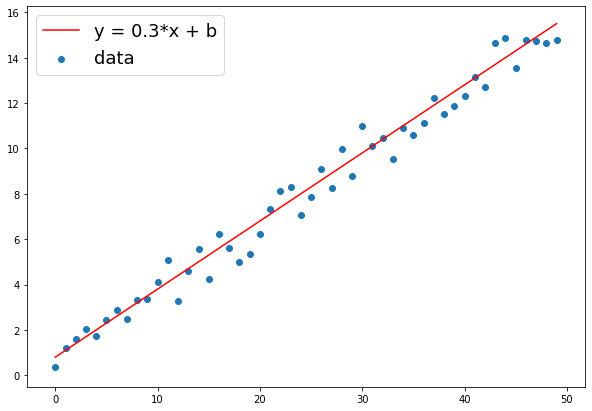

In [81]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, color='r', label='y = 0.3*x + b')
plt.scatter(x, yy, label='data')
plt.legend(fontsize=18)
plt.show()

## 샘플 데이터 생성 코드를 함수로 만들기

In [110]:
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.arange(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

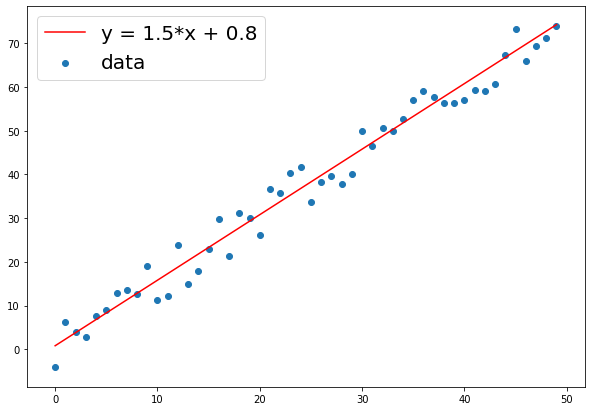

w: 1.5, b: 0.8


In [134]:
x, y = make_linear(size=50, w=1.5, b=0.8, noise=5.5)

## Python 코드로 구현

### 최소제곱법 (Least Square) 공식

**RSS(Residual Sum of Square)**

실제 값(y)과 가설($\hat{y}$)에 의한 예측 값의 차이가 가장 작은 계수 계산

선형함수: 

$y = wx + b$일때,

- $w = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

- $b = \bar{y} - a\bar{x}$

### x_bar(x 평균), y_bar (y 평균) 구하기

In [112]:
x_bar = x.mean()
y_bar = y.mean()

### w의 계수 값 찾기

$w = \frac{\sum(x-\bar{x})(y-\bar{y})}{\sum(x-\bar{x})^{2}}$

In [113]:
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
print('w: {:.2f}'.format(calculated_weight))

w: 1.51


### b의 계수 값 구현


$b = \bar{y} - a\bar{x}$

In [114]:
calculated_bias = y_bar - calculated_weight * x_bar

In [115]:
print('b: {:.2f}'.format(calculated_bias))

b: 0.01


### 노이즈 값을 증가 시켰을 때

최소제곱법은 **노이즈에 취약하다는 단점**이 있습니다.

이를 직접 눈으로 확인해 보도록 하겠습니다.

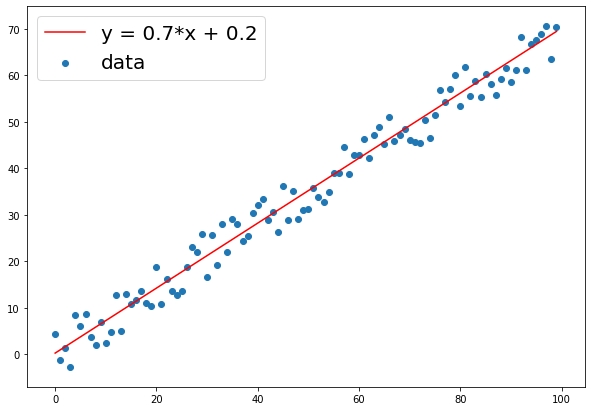

w: 0.7, b: 0.2


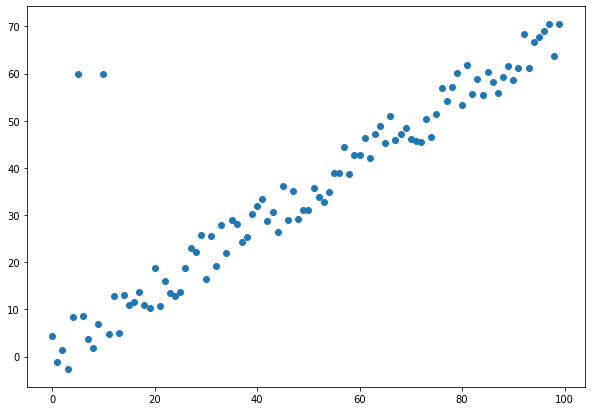

In [121]:
x, y = make_linear(size=100, w=0.7, b=0.2, noise=5.5)
# 임의로 2개의 outlier를 추가해 보도록 하겠습니다.
y[5]=60
y[10]=60

plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

In [122]:
# 위에서 구한 w, b 찾는 공식을 그대로 적용합니다.
x_bar = x.mean()
y_bar = y.mean()
calculated_weight = ((x - x_bar) * (y - y_bar)).sum() / ((x - x_bar)**2).sum()
calculated_bias = y_bar - calculated_weight * x_bar

print('w: {:.2f}, b: {:.2f}'.format(calculated_weight, calculated_bias))

w: 0.63, b: 4.26


위의 결과에서도 볼 수 있듯이, `outlier`에 취약합니다.

근본적으로 x, y의 평균 값을 활용하여 기울기 (w)와 절편 (b)를 구하게 될 때, outlier가 크게 영향을 끼치는 것을 볼 수 있습니다.

## 최소제곱법 (OLS)를 활용한 LinearRegression 

scikit-learn 패키지의 `LinearRegression`이 바로 최소 제곱 추정 방식으로 회귀 예측 알고리즘 입니다.

[LinearRegression 도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
model = LinearRegression()

In [126]:
model.fit(x.reshape(-1, 1), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
print('w: {:.2f}, b: {:.2f}'.format(model.coef_[0], model.intercept_))

w: 0.63, b: 4.26
